**customer_shopping_analysis**

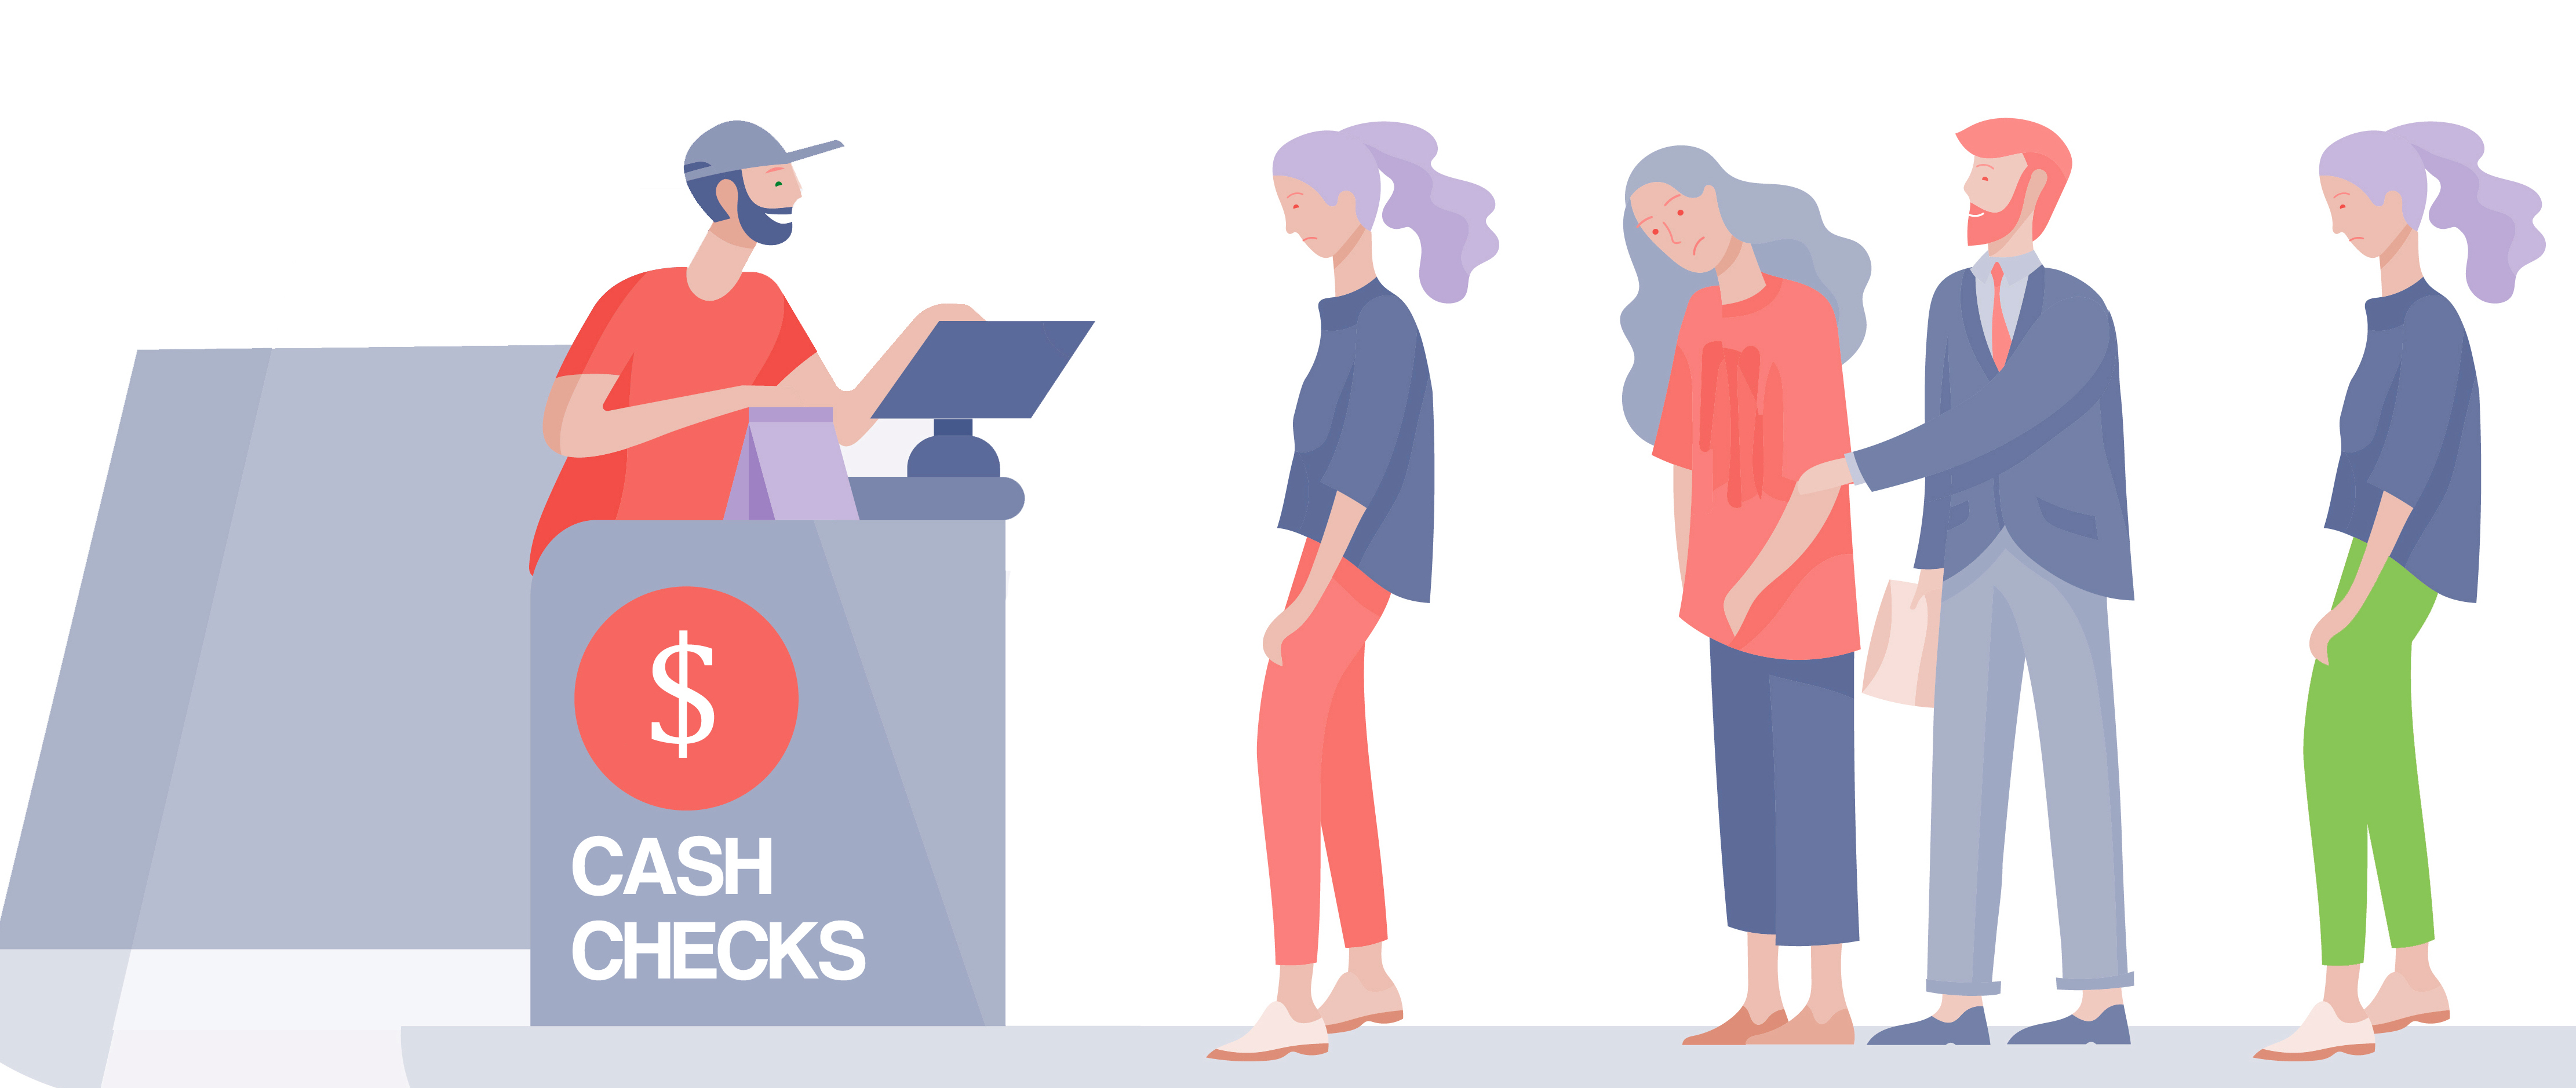

# 导入库

In [1]:
import numpy as np 
import pandas as pd 
import datetime
from matplotlib import pyplot as plt 
import seaborn as sns
plt.style.use(['fivethirtyeight'])

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

# 加载数据

In [2]:
data = pd.read_csv('/Users/robert/python/marketing_campaign.csv', sep= '\t')
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
data.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


# 数据准备

 - 数据维度说明

| 分类 	| 列名 	| 说明 	|
|---	|---	|---	|
| 用户属性 	| ID 	| 用户的唯一标识符 	|
| 用户属性 	| Year_Birth 	| 用户的出生年份 	|
| 用户属性 	| Education 	| 教育水平 	|
| 用户属性 	| Marital_Status 	| 婚姻状况 	|
| 用户属性 	| Income 	| 年家庭收入 	|
| 用户属性 	| Kidhome 	| 儿童数量 	|
| 用户属性 	| Teenhome 	| 青少年人数 	|
| 用户健康度 	| Dt_Customer 	| 顾客注册的日期 	|
| 用户健康度 	| Recency 	| 自用户上次购买以来的天数 	|
| 用户健康度 	| NumWebVisitsMonth 	| 上个月访问公司网站的次数 	|
| 用户健康度 	| Complain 	| 如果用户在过去 2 年内投诉，则为 1，否则为 0 	|
| 交易信息 	| MntWines 	| 过去两年在葡萄酒上的消费金额 	|
| 交易信息 	| MntFruits 	| 过去两年在水果上的花费 	|
| 交易信息 	| MntMeatProducts 	| 过去2年肉类消费量 	|
| 交易信息 	| MntFishProducts 	| 过去2年在鱼上花费的金额 	|
| 交易信息 	| MntSweetProducts 	| 过去2年在糖果上花费的金额 	|
| 交易信息 	| MntGoldProds 	| 过去2年在黄金上花费的金额 	|
| 交易来源 	| NumWebPurchases 	| 通过公司网站进行的购买数量 	|
| 交易来源 	| NumCatalogPurchases 	| 使用目录进行的购买数量 	|
| 交易来源 	| NumStorePurchases 	| 直接在商店购买的数量 	|
| 运营转化信息 	| NumDealsPurchases| 打折的购买次数 	|
| 运营转化信息 	| AcceptedCmp1 	| 如果用户在第一个活动中接受了报价，则为 1，否则为 0 	|
| 运营转化信息 	| AcceptedCmp2 	| 如果用户在第二个活动中接受了报价，则为 1，否则为 0 	|
| 运营转化信息 	| AcceptedCmp3 	| 如果用户在第三个活动中接受了报价，则为 1，否则为 0 	|
| 运营转化信息 	| AcceptedCmp4 	| 如果用户在第 4 个活动中接受了报价，则为 1，否则为 0 	|
| 运营转化信息 	| AcceptedCmp5 	| 如果用户在第 5 个活动中接受了报价，则为 1，否则为 0 	|
| 运营转化信息 	| Response 	| 如果用户在上次活动中接受了报价，则为 1，否则为 0 	|
|  	| Z_CostContact 	| Z_成本联系方式 	|
|  	| Z_Revenue 	| Z_收入 	|

In [4]:
# 检查缺失值
print("缺失值:\n", data.isnull().sum())    # 收入数据有缺失值，缺失了24条数据

缺失值:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [5]:
# 检查是否有重复数据
data.duplicated().sum()

0

# 分析思路：
- 目标：挖掘数据的价值，助力业务成长和用户增长
- 用户信息----做用户画像
- 用户健康度----做用户价值评级
- 交易信息--做推荐算法
- 交易来源----做增长分析
- 运营转化----评估运营活动的效果


# 数据清洗
- 收入数据有24条缺失值，使用均值对其进行填充
- 顾客注册时间需要转换为日期格式
- 教育水平和婚姻状态两个变量需要对其进行重新编码

In [6]:
# 采用均值对收入列的24条缺失数据进行填充
data = data.fillna(data['Income'].mean())

In [7]:
# 将注册日期数据格式调整为日期格式
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Dt_Customer'].apply(['min', 'max'])

min   2012-01-08
max   2014-12-06
Name: Dt_Customer, dtype: datetime64[ns]

In [8]:
print("婚姻状况:\n", data['Marital_Status'].value_counts(), '\n')
print("教育情况:\n", data['Education'].value_counts())

婚姻状况:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

教育情况:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


Text(0.5, 1.0, 'Propotion of Marital_Status')

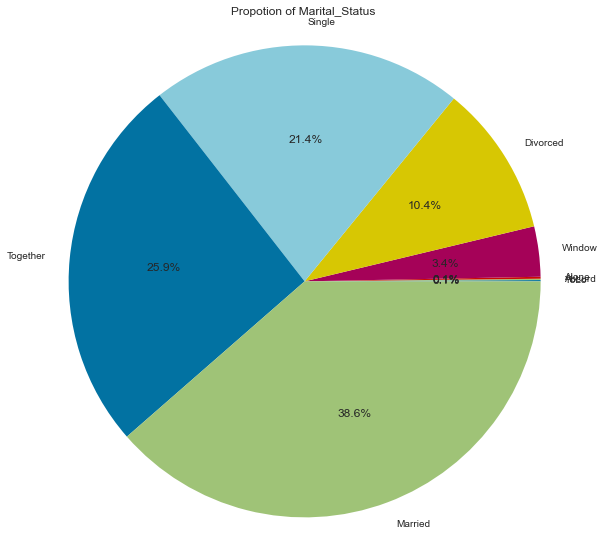

In [9]:
# 不同婚姻状态的顾客所占比例
plt.figure(figsize=(9, 9))
x = data['Marital_Status'].value_counts().sort_values()
plt.pie(x=x, labels=['YoLo', 'Absurd','Alone', 'Window', 'Divorced', 'Single', 'Together','Married'],
        autopct = '%1.1f%%', )
plt.axis('equal')
plt.title('Propotion of Marital_Status')

Text(0.5, 1.0, 'Propotion of Education')

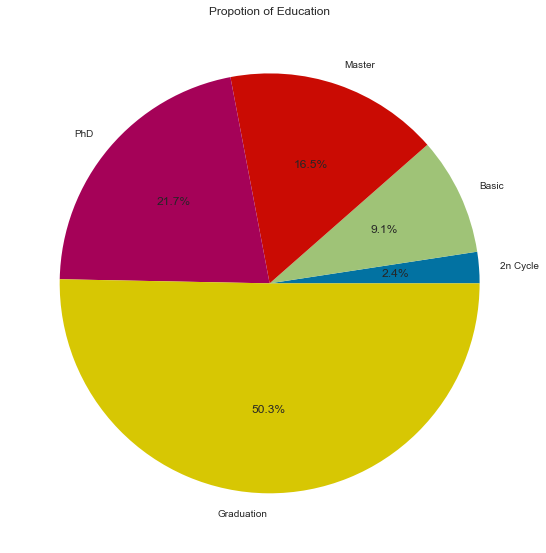

In [10]:
# 不同受教育水平的顾客所占比例
x = data['Education'].value_counts().sort_values()

plt.figure(figsize=(9,9))
plt.pie(x=x, labels=['2n Cycle', 'Basic', 'Master', 'PhD', 'Graduation'], autopct = '%1.1f%%')
plt.title('Propotion of Education')

# 数据预处理

**创建新的数据特征:**

- 利用出生日期创建Age（年龄）列
- 创建Spent（总消费）列
- 创建Children（小孩）列
- 创建TotalAcceptedCmp（接受报价次数合计）列
- 创建NumTotalPurchases（总购买数量）列

In [11]:
data['Age'] = data.apply(lambda data:  2015- data['Year_Birth'], axis=1)
data['Spent'] = data.apply(lambda data: data['MntFishProducts'] + data['MntFruits'] + data['MntGoldProds'] + 
                data['MntMeatProducts'] + data['MntSweetProducts'] + data['MntWines'], axis=1)


data['Children'] = data.apply(lambda data: data['Kidhome'] + data['Teenhome'], axis=1)

data['TotalAcceptedCmp'] = data.apply(lambda data: data['AcceptedCmp1'] + data['AcceptedCmp2'] + 
                                      data['AcceptedCmp3'] + data['AcceptedCmp4'] + 
                                      data['AcceptedCmp5'], axis=1)
data['NumTotalPurchases'] = data.apply(lambda data: data['NumWebPurchases'] + data['NumCatalogPurchases'] + 
                            data['NumStorePurchases'] + data['NumDealsPurchases'], axis=1)


In [12]:
# 删除'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome'列
data = data.drop(['Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome'], axis=1) 

In [13]:
# 删除数据中收入和年龄的异常值部分
data = data.drop(data.loc[data['Income'] > 600000].index)
data = data.drop(data.loc[data['Age'] > 100].index)

## 数据可视化

In [14]:
# 创建新的特征”Have_Children“，有小孩值为1，没有小孩值为0
data['Have_Children'] = np.where(data.Children > 0, 1, 0)
data.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,TotalAcceptedCmp,NumTotalPurchases,Have_Children
0,5524,Graduation,Single,58138.0,2012-04-09,58,635,88,546,172,...,0,0,0,1,58,1617,0,0,25,0
1,2174,Graduation,Single,46344.0,2014-08-03,38,11,1,6,2,...,0,0,0,0,61,27,2,0,6,1
2,4141,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,...,0,0,0,0,50,776,0,0,21,0
3,6182,Graduation,Together,26646.0,2014-10-02,26,11,4,20,10,...,0,0,0,0,31,53,1,0,8,1
4,5324,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,...,0,0,0,0,34,422,1,0,19,1


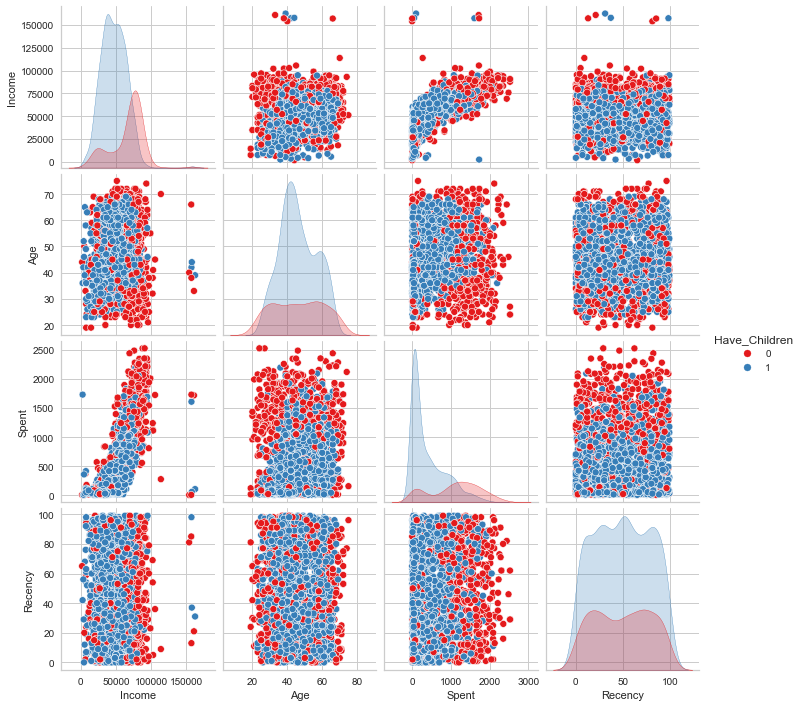

In [15]:
# 以是否有小孩为分组对数据进行分组绘制散点图矩阵
pairplot = data.loc[:, ['Income', 'Age', 'Spent', 'Recency', 'Have_Children']]

sns.pairplot(pairplot, hue='Have_Children', palette='Set1')

In [16]:
# 对连续型变量Age进行面元划分
bins = [0, 20, 40, 60, 80,100]
aged = pd.cut(data['Age'], bins=bins)
print('number of age_cut:\n', aged.value_counts())

number of age_cut:
 (40, 60]     1143
(20, 40]      770
(60, 80]      316
(0, 20]         7
(80, 100]       0
Name: Age, dtype: int64


Text(0.5, 1.0, 'countplot of Age')

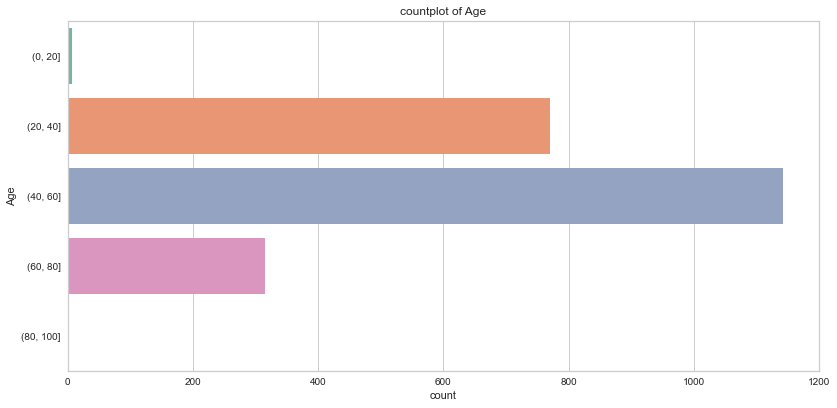

In [17]:
# 不同年龄段顾客分类汇总
plt.figure(figsize=(12,6))
sns.countplot(y=aged, palette='Set2')
plt.title('countplot of Age')

<AxesSubplot:xlabel='Age', ylabel='Spent'>

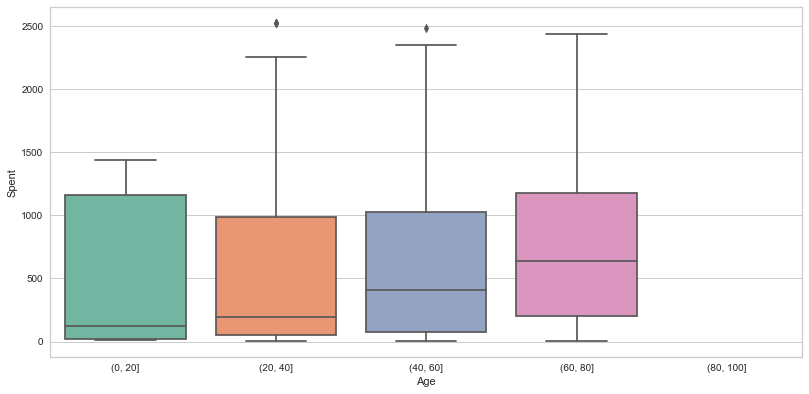

In [18]:
# 不同年龄区间在购物花费上的区别
plt.figure(figsize=(12,6))
sns.boxplot(x=aged, y=data['Spent'], palette='Set2')

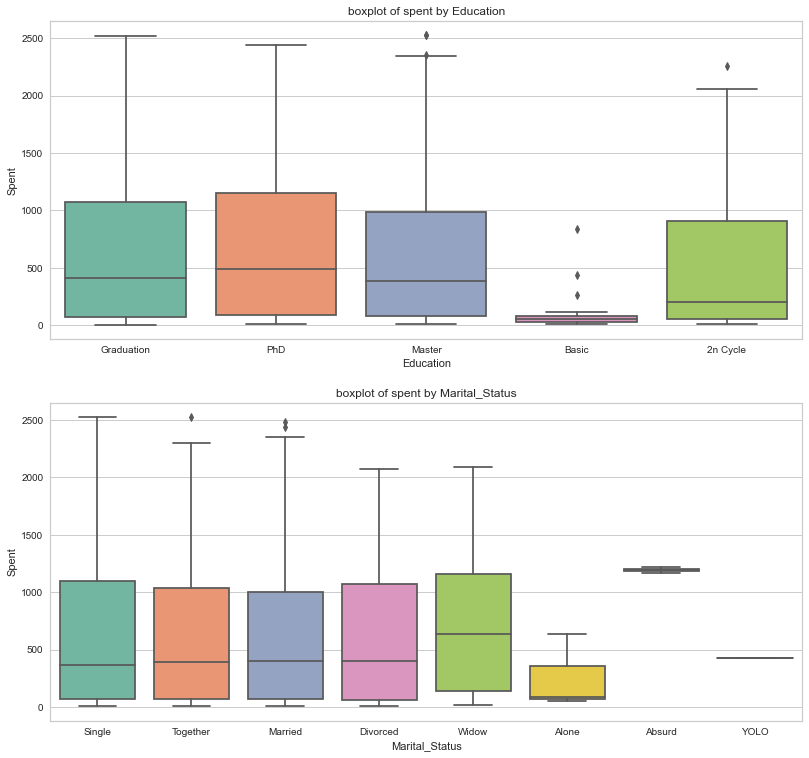

In [19]:
# 受教育水平和购物花费间的关系
# 不同婚姻状态下顾客的花费比较
to_boxplot = ['Education', 'Marital_Status']
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
axes = axes.flatten()

for col, ax in zip(to_boxplot, axes):
    ax = sns.boxplot(data=data, x=col, y='Spent', ax=ax, palette='Set2')
    ax.set_title(f'boxplot of spent by {col}')

<AxesSubplot:xlabel='Marital_Status', ylabel='Spent'>

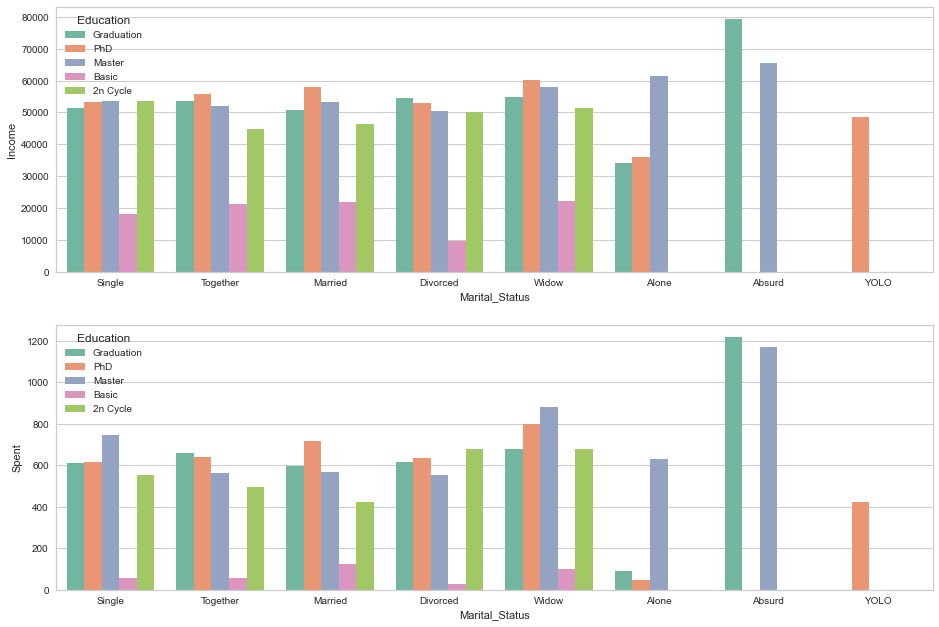

In [20]:
# 以教育水平的不同对不同婚姻状态的顾客进行分组，并对比其在收入和购物花费上的差异对比
fig, axes = plt.subplots(2, 1, figsize=(14,10))
sns.barplot(x= 'Marital_Status',y='Income',hue='Education',data=data, ci=0,palette='Set2', ax=axes[0])
sns.barplot(x= 'Marital_Status',y='Spent',hue='Education',data=data, ci=0, palette='Set2', ax=axes[1])

<AxesSubplot:xlabel='Income', ylabel='Spent'>

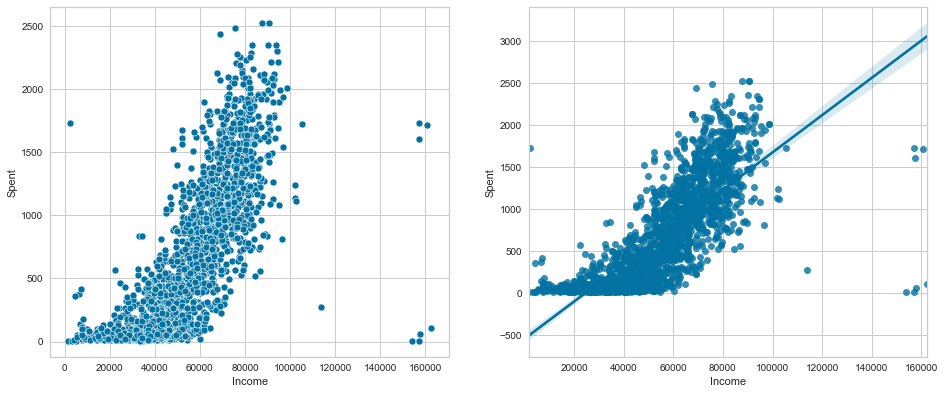

In [21]:
# 收入和支出呈线性增长关系
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.scatterplot(y=data['Spent'], x=data['Income'], ax=axes[0])
sns.regplot(y='Spent', x='Income', data=data, ax=axes[1])


Text(0.5, 1.0, 'histogram of Spent')

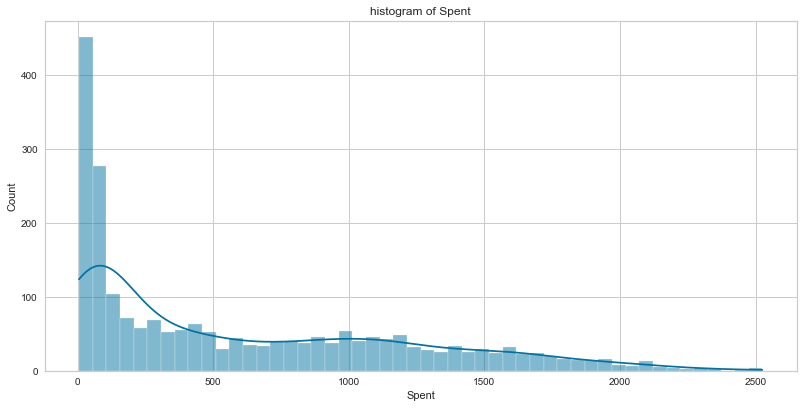

In [22]:
# 网站顾客整体花费直方图
plt.figure(figsize=(12,6))
sns.histplot(data['Spent'], bins=50, kde=True)
plt.title('histogram of Spent')

<AxesSubplot:xlabel='Recency', ylabel='Count'>

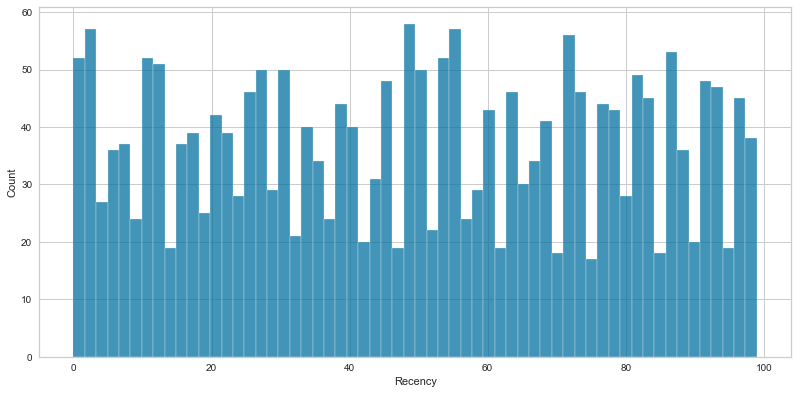

In [23]:
# 自用户上次购买以来的天数的频数分布
plt.figure(figsize=(12,6))
sns.histplot(data['Recency'], bins=60)

Text(0.5, 1.0, 'Monthly activities (5-7)/month')

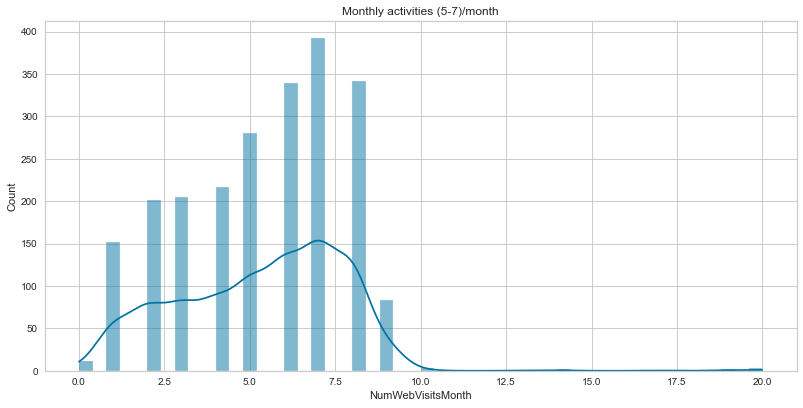

In [24]:
# 网站用户月度活跃频数统计
plt.figure(figsize=(12,6))
sns.histplot(data['NumWebVisitsMonth'], bins=50, kde=True)
plt.title('Monthly activities (5-7)/month')

Text(0.5, 1.0, 'Complain of customer')

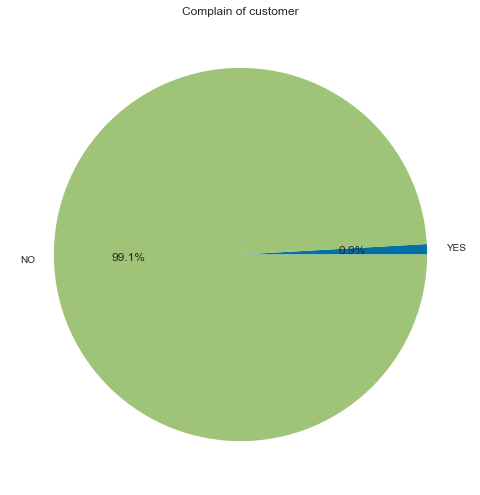

In [25]:
# 网站投诉情况
x = data['Complain'].value_counts().sort_values()

plt.figure(figsize=(8,8))
plt.pie(x=x, labels=['YES', 'NO'], autopct = '%1.1f%%')
plt.title('Complain of customer')

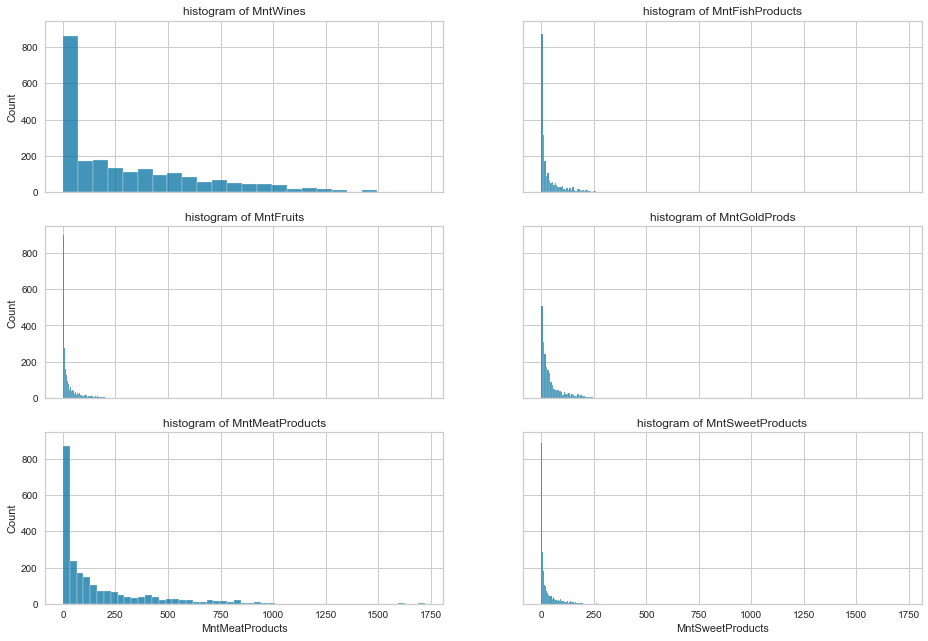

In [26]:
# 酒、鱼、水果、黄金、肉、糖果各自销量频数统计
to_histplot = ['MntWines', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 
               'MntMeatProducts', 'MntSweetProducts']

fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(14, 10))
axes = axes.flatten()

for col, ax in zip(to_histplot, axes):
    ax = sns.histplot(data=data, x=col, ax=ax)
    ax.set_title(f'histogram of {col}')


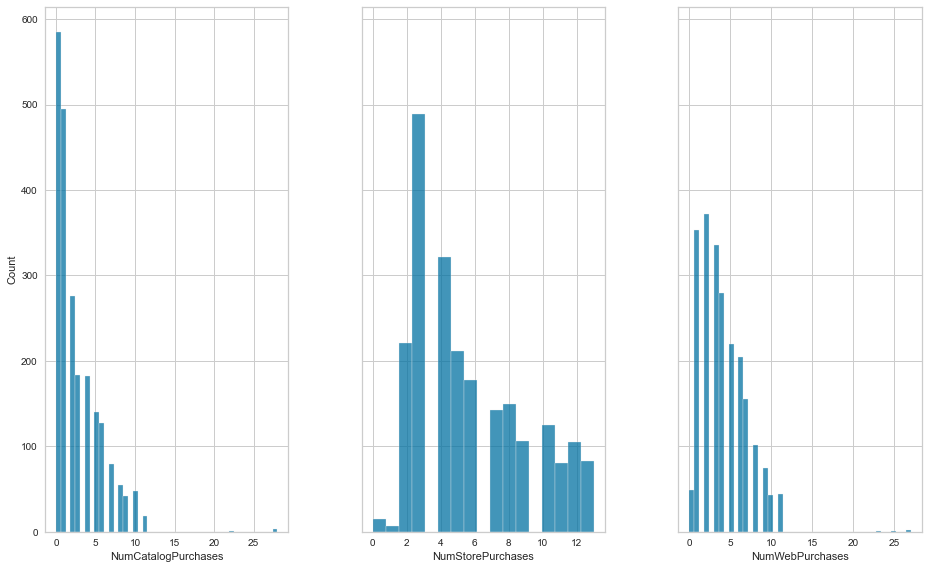

In [27]:
# 通过目录、商店和网站三个渠道购买的频数统计
to_histplot = ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14, 9))
axes = axes.flatten()

for col, ax in zip(to_histplot, axes):
    ax = sns.histplot(data=data, x=col, ax=ax)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

In [28]:
# 创建总活动接受报价次数指标
acceptedConcat = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
acceptedConcat = acceptedConcat.apply(pd.DataFrame.sum)

print('acceptedConcat:\n', acceptedConcat)

acceptedConcat:
 AcceptedCmp1    144
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    162
dtype: int64


<AxesSubplot:title={'center':'accepted the campaings in every attempt'}>

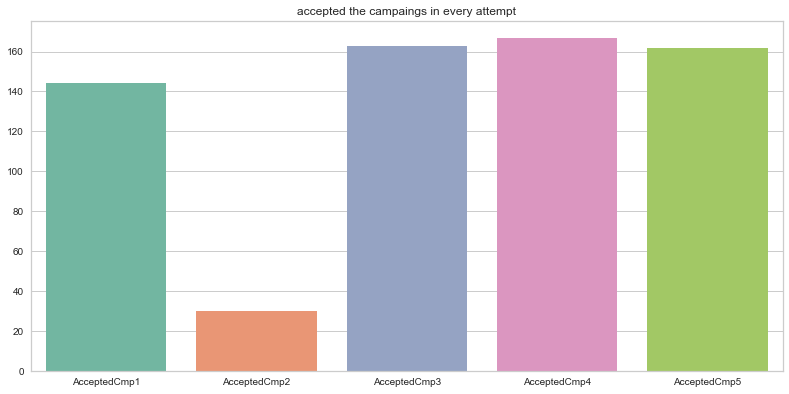

In [29]:
# 每次接受活动报价的用户的频数统计
plt.figure(figsize=(12,6))
plt.title('accepted the campaings in every attempt')
sns.barplot(x=acceptedConcat.index, y=acceptedConcat, palette='Set2')

<AxesSubplot:title={'center':'Recency Vs Acceptance of an offer'}, xlabel='Recency', ylabel='Response'>

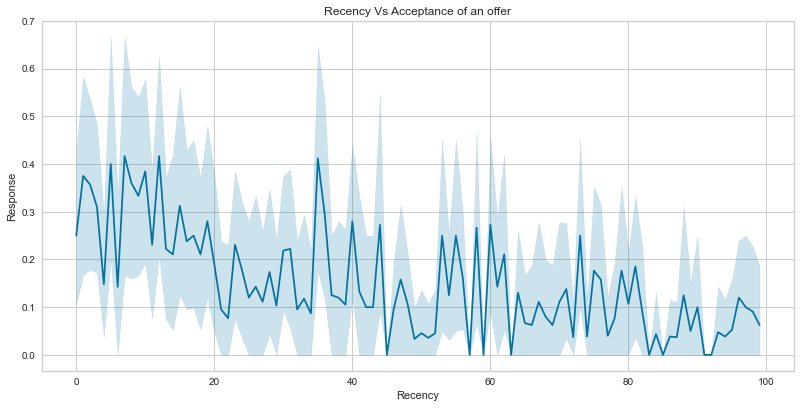

In [30]:
# 用户上次购买以来的天数和在上次活动是否接受报价间的关系
plt.figure(figsize=(12,6))
plt.title('Recency Vs Acceptance of an offer')
sns.lineplot(x='Recency', y='Response', data=data)

<AxesSubplot:title={'center':'Customer NumWebVisitsMonth by mounths'}, xlabel='Dt_Customer'>

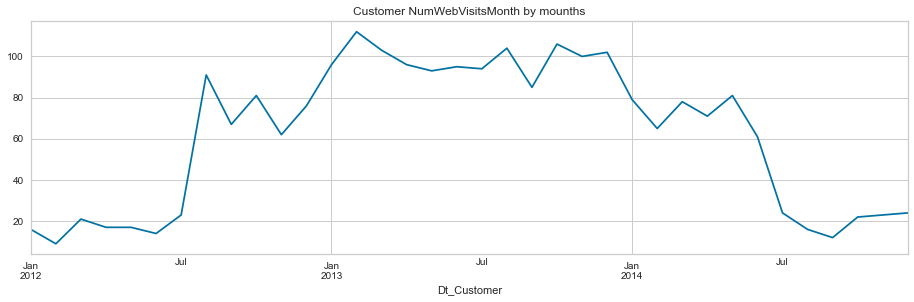

In [31]:
# 网站每月活跃用户折线图
groupedDate = data.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer NumWebVisitsMonth by mounths')
groupedDate.NumWebVisitsMonth.plot(kind='line')

<AxesSubplot:title={'center':'Customer Spent by mounths'}, xlabel='Dt_Customer'>

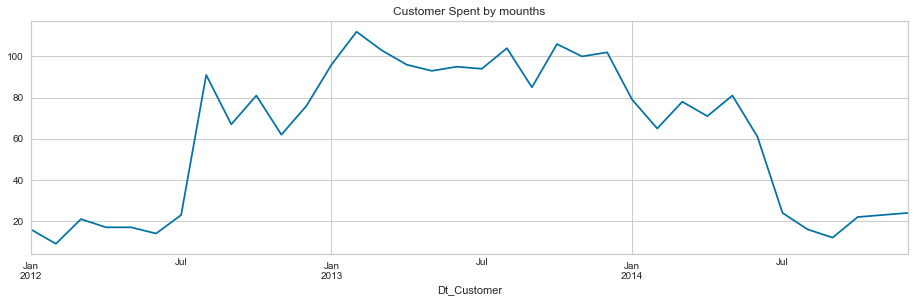

In [32]:
# 每月总体消费金额折线图
groupedDate = data.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer Spent by mounths')
groupedDate.Spent.plot(kind='line')

<AxesSubplot:title={'center':'Customer NumWebPurchases by mounths'}, xlabel='Dt_Customer'>

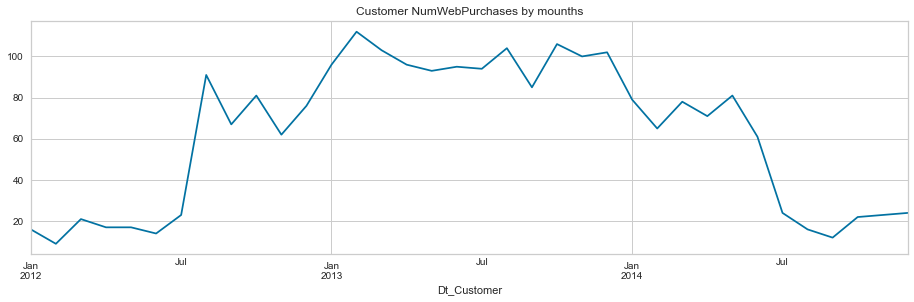

In [33]:
# 每月通过网站购买的用户折线图
groupedDate = data.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer NumWebPurchases by mounths')
groupedDate.NumWebPurchases.plot()

<AxesSubplot:title={'center':'Customer NumCatalogPurchases by mounths'}, xlabel='Dt_Customer'>

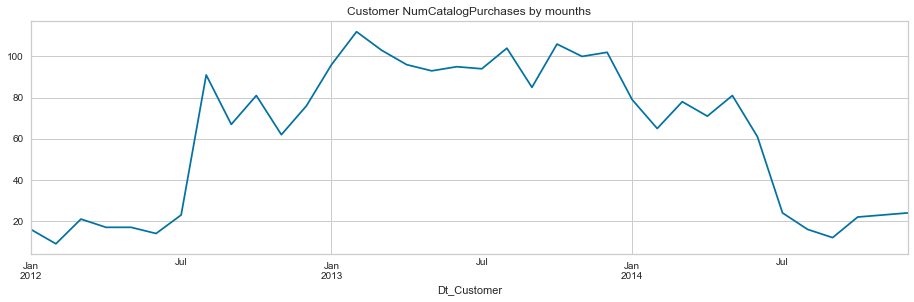

In [34]:
# 每月通过目录购买的用户折线图
groupedDate = data.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer NumCatalogPurchases by mounths')
groupedDate.NumCatalogPurchases.plot(kind='line')

<AxesSubplot:title={'center':'Customer NumStorePurchases by mounths'}, xlabel='Dt_Customer'>

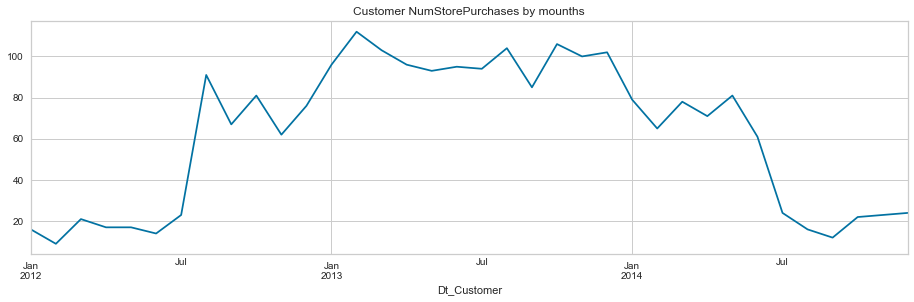

In [35]:
#每月通过商店购买的用户折现图
groupedDate = data.set_index('Dt_Customer')

groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer NumStorePurchases by mounths')
groupedDate.NumStorePurchases.plot(kind='line')

自2014年6月份以来网站的网站访问次数和交易总量出现了大幅的下滑。通过网站、目录、商店直接购买的三个渠道都出现了相同轨迹的下滑。

# 数据预处理

In [36]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [37]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

<AxesSubplot:>

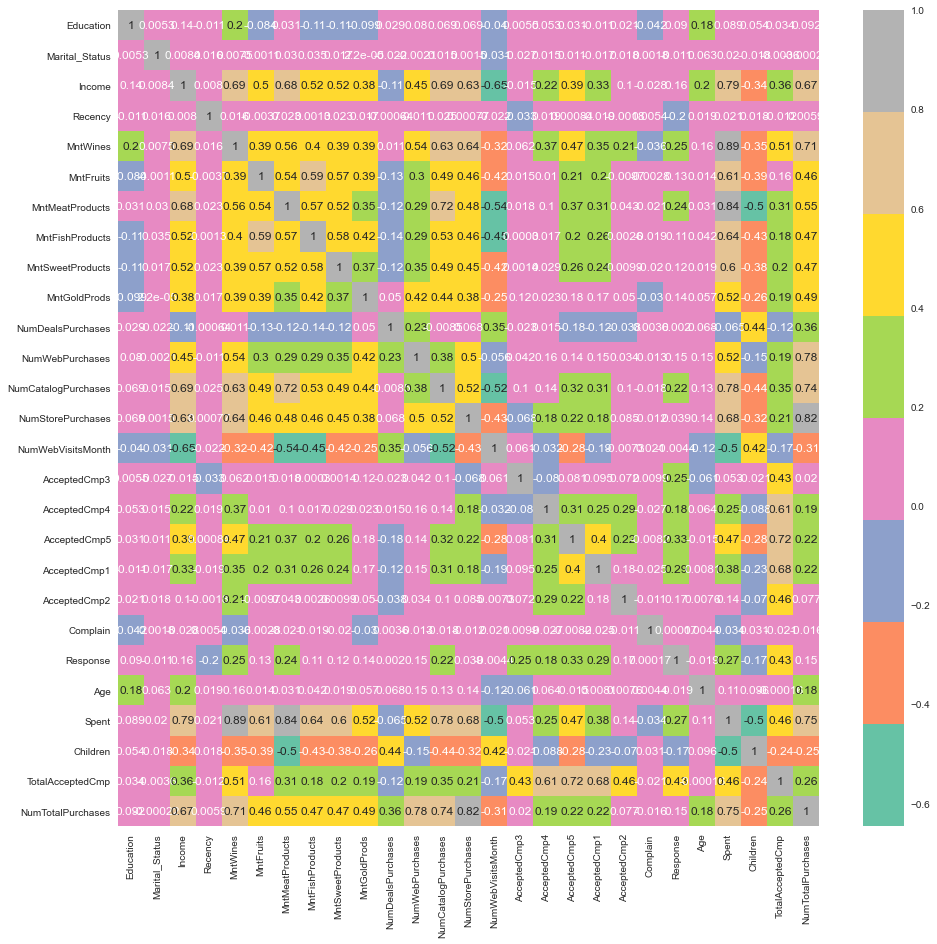

In [38]:
# 相关性热力图
plt.figure( figsize = (14, 14))
data1 = data.iloc[:, 1:-1]
sns.heatmap(data1.corr(), annot=True, cmap='Set2')

In [39]:
ds = data.copy()

cols_del = ['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 
            'Complain', 'Response', 'Have_Children', 'Dt_Customer',  'Children']
ds = ds.drop(cols_del, axis=1)


In [40]:
# 数据标准化
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )


# PCA降维

In [41]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,-1.906644e-17,2.750925,-4.773500,-2.596942,-0.625790,2.415186,7.796490
col2,2236.0,9.533221e-18,1.364270,-4.447533,-0.928340,-0.237996,0.789395,5.705854
col3,2236.0,-1.588870e-17,1.172936,-4.113489,-0.778215,0.019514,0.728241,4.896162


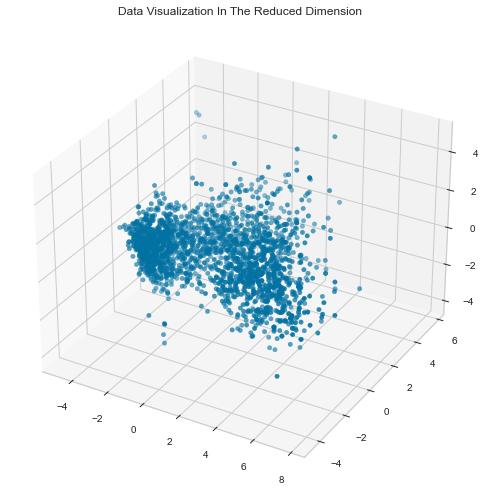

In [42]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

# 降维后数据可视化
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("Data Visualization In The Reduced Dimension")
plt.show()

# 聚类

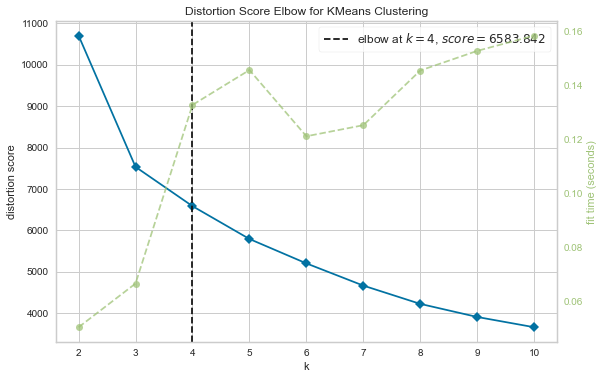

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [44]:
AC = AgglomerativeClustering(n_clusters=4)

# 拟合模型并预测聚类
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

# 将聚类特征添加到原始数据
data["Clusters"]= yhat_AC

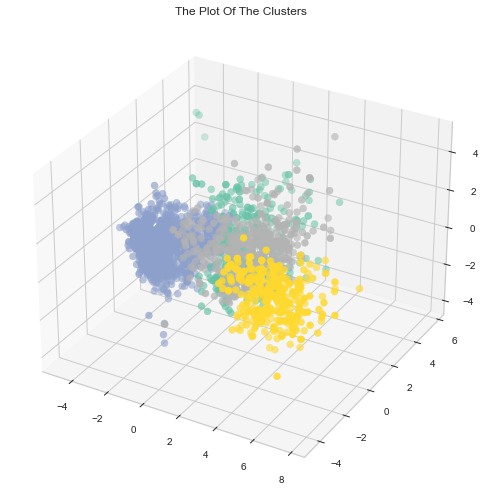

In [45]:
# 聚类结果可视化
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=50, c=PCA_ds["Clusters"], marker='o', cmap = 'Set2' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# 评估模型

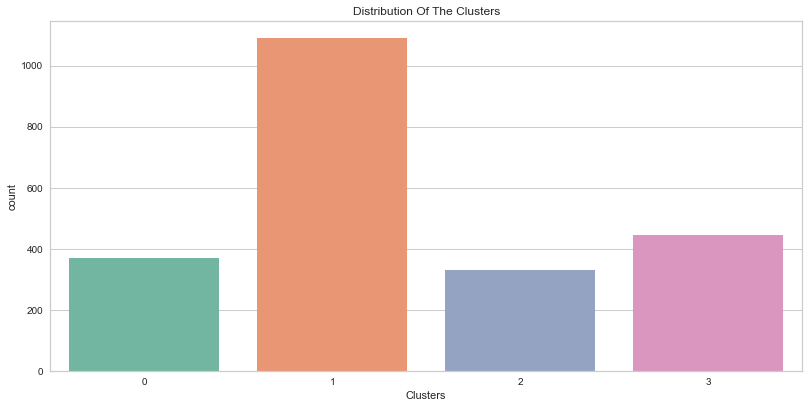

In [46]:
# 聚类结果分布图
plt.figure(figsize=(12, 6))
pl = sns.countplot(x=data["Clusters"], palette= 'Set2')
pl.set_title("Distribution Of The Clusters")
plt.show()

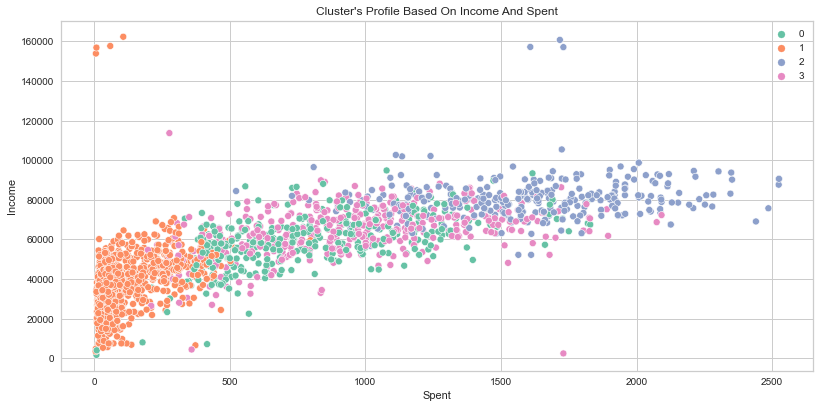

In [47]:
# 按照收入和支出对聚类结果进行可视化
plt.figure(figsize=(12, 6))
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= 'Set2')
pl.set_title("Cluster's Profile Based On Income And Spent")
plt.legend()
plt.show()

**收入与支出图显示集群模式**

- 第 0 组：高支出和平均收入
- 第 1 组：高消费和高收入
- 第 2 组：低支出和低收入
- 第 3 组：高支出和低收入

<AxesSubplot:xlabel='Clusters', ylabel='Spent'>

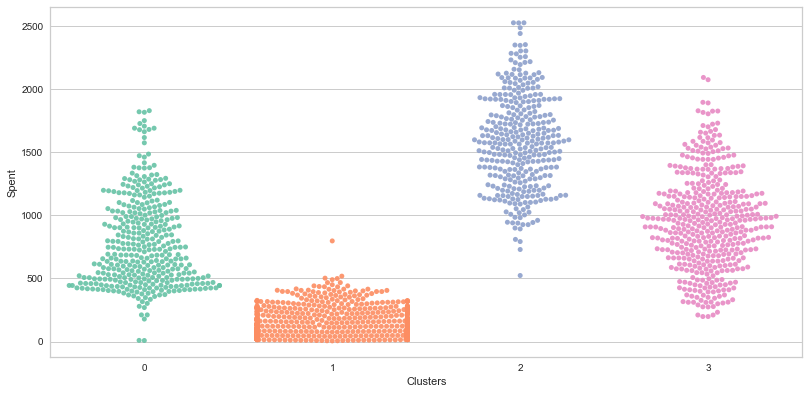

In [48]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=data["Clusters"], y=data["Spent"], alpha=0.9, palette= 'Set2' )

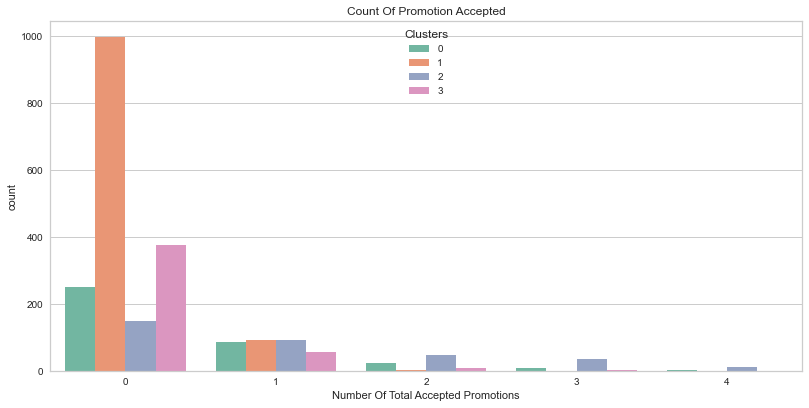

In [49]:
# 按照聚类结果对活动总接受情况进行可视化
plt.figure(figsize=(12,6))
pl = sns.countplot(x=data["TotalAcceptedCmp"],hue=data["Clusters"], palette= 'Set2')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()